In [18]:
import pandas as pd
import numpy as np 

In [20]:
from sklearn.datasets import fetch_openml

In [22]:
df = fetch_openml("mnist_784", version=1, as_frame=False)
df

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [32]:
numbers=df["data"]


In [34]:
len(numbers)

70000

In [53]:
numbers = pd.DataFrame(numbers)
numbers.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [51]:
numbers["class"]=df["target"]
numbers.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [61]:
X = numbers.drop("class",axis=1)
X = X / 255.0
y = numbers["class"]

In [55]:
import matplotlib.pyplot as plt

In [73]:
X_numpy = X.values
index= 0
image = X_numpy[index].reshape(28 ,28)
label = y[index]

Text(0.5, 1.0, 'Número 5')

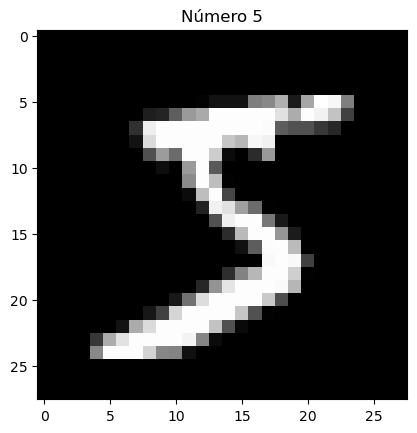

In [75]:
plt.imshow(image, cmap="gray")
plt.title(f"Número {label}")

In [78]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [99]:
y_train.value_counts()



class
1    6277
7    5790
3    5708
2    5610
0    5560
9    5538
4    5529
6    5480
8    5468
5    5040
Name: count, dtype: int64

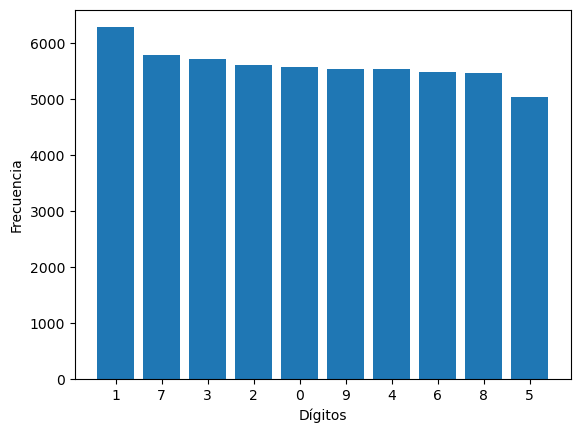

In [123]:
counts = y_train.value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Dígitos")
plt.ylabel("Frecuencia")
plt.show()

## modelos de clasificación 

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


models = {
    "RandomForestClassifier":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators": [50, 100,200],
            "max_depth": [None,10,20],
            "min_samples_split":[2,5,10]
        }
                        
    },
    "LogisticRegression":{
        "model":LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "SVM":{
        "model":svm.SVC(),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "kernel": ["linear", "rbf"]
        }
        
    }
    
}

In [147]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

for name, model_info in models.items():
    model=model_info["model"]
    param_grid = model_info["params"]

    grid_search=GridSearchCV(model, param_grid,cv=5, scoring="accuracy",n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Evaluar en el conjunto de prueba
    test_score = best_model.score(X_test, y_test)

    #reporte para obtener precisión, recall y F1-Score
    y_pred = best_model.predict(X_test)
    classification = classification_report(y_test, y_pred)
    

    print(f"🔹 Modelo: {name}")
    print(f"   ✅ Mejores parámetros: {best_params}")
    print(f"   🔥 Mejor score en validación cruzada: {best_score:.4f}")
    print(f"   🎯 Score en test: {test_score:.4f}")
    print(f"Reporte clasificación: {classification}")
    print("-" * 50)



🔹 Modelo: RandomForestClassifier
   ✅ Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
   🔥 Mejor score en validación cruzada: 0.9684
   🎯 Score en test: 0.9691
Reporte clasificación:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.98      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

---------------------

C:\Users\Adrian\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Modelo: LogisticRegression
   ✅ Mejores parámetros: {'C': 0.1, 'solver': 'lbfgs'}
   🔥 Mejor score en validación cruzada: 0.9216
   🎯 Score en test: 0.9215
Reporte clasificación:               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

--------------------------------------------------
🔹 Modelo: